## Описание задачи 📕

1) Найти на портале ГИС ЖКХ (https://dom.gosuslugi.ru/#!/main) данные о количестве платежей ЖКХ по субъектам РФ
2) Найти на портале данные о тарифах ЖКХ
3) Сформулировать правила расчета и рассчитать приблизительный средний тариф ЖКХ по субъектам РФ за 2023 год по данным ГИС ЖКХ и/или другим источникам 
4) Определить объем рынка ЖКХ в рублях по субъектам РФ и в целом в РФ

## Результат ✅

1) Оценка объема рынка ЖКХ по субъектам РФ и в целом в РФ
2) Файл в формате ipynb с кодом расчета объема рынка ЖКХ в рублях и коротким описанием методологии расчета

## Алгоритм решения задачи 👨‍💻

1) Установить вводные данные исследования: отобрать группу населения для изучения, их место и площадь жилья, кол-во человек внутри группы + определить тарифы ЖКХ, выплачиваемые рассматриваемой группой;
2) Загрузить имеющиеся данные по рассматриваемым тарифам: сами тарифы и их норма потребления;
3) Обработать данные: отобрать нужные данные, убрать выбросы;
4) Рассчитать средние выплаты по ЖКХ на регионы и на РФ в целом;
5) Сравнить полученные данные с похожими исследованиями или статьями.

# ==========================================================

In [122]:
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import random
import requests
from tqdm import tqdm

## 1. Установливаем вводные данные исследования

**Изучаемая группа населения**
- Кол-во людей в домохозяйстве - 3 [Ссылка](https://foxtime.ru/chto-iz-sebya-predstavlyaet-srednestatisticheskaya-semya-v-rossii/#:~:text=%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D0%BD%D1%81%D1%82%D0%B2%D0%BE%20%D1%80%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D1%85%20%D1%81%D0%B5%D0%BC%D0%B5%D0%B9%20%D0%B8%D0%BC%D0%B5%D1%8E%D1%82%20%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE,%2C%20%D1%87%D0%B5%D1%82%D0%B2%D0%B5%D1%80%D1%82%D1%8C%20%D1%81%D0%B5%D0%BC%D0%B5%D0%B9%20%E2%80%93%20%D0%B8%D0%B7%20%D1%87%D0%B5%D1%82%D1%8B%D1%80%D1%91%D1%85.)
- Условия проживания - город, квартирный дом, квартира в частной собственности, есть газовая плита
- Площадь жилья - 52.3 м$^2$ [Ссылка](https://versia.ru/v-rossii-umenshilas-srednyaya-ploshhad-kvartir#:~:text=%D0%97%D0%B0%20%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D0%BD%D0%B8%D0%B5%20%D0%B4%D0%B5%D1%81%D1%8F%D1%82%D1%8C%20%D0%BB%D0%B5%D1%82%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D1%8F%D1%8F,%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D1%8F%D0%B5%D1%82%2052%2C3%20%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BD%D1%8B%D1%85%20%D0%BC%D0%B5%D1%82%D1%80%D0%B0.)
- Уплачиваемые тарифы:
    - Электричество
    - Холодная вода
    - Горячая вода
    - Водоотведение
    - Отопление
    - Газ
    - Плата за текущий ремонт и содержание
    - Взносы на капитальный ремонт
    - Вывоз мусора

In [50]:
living_area = 52.3
living_people = 3

## 2. Загружаем все необходимые данные

#### 1) Тарифы на оплату коммунальных ресурсов
URL: https://dom.gosuslugi.ru/filestore/publicDownloadServlet?context=tariff-exports&uid=14a51197-f631-4337-b7ae-f2c968e96fb1

In [14]:
data_path = 'Data/Тарифы на оплату коммунальных ресурсов от 29.05.2023/'
rate_files = [i for i in os.listdir(data_path) if '.xlsx' in i and '$' not in i] 
rates_df = pd.DataFrame()
for file in tqdm(rate_files):
    df = pd.read_excel(data_path + file)
    df['Регион'] = file.split('.')[0]
    rates_df = pd.concat([rates_df, df])


# Оставляем только нужные колонки
rates_df = rates_df[['Регион',
                     'Вид тарифа',
                     'Величина тарифа (ставки тарифа)']].reset_index(drop=True)

100%|███████████████████████████████████████████| 81/81 [01:23<00:00,  1.03s/it]


In [20]:
rates_df.head()

Регион                            Вид тарифа  \
0  Астраханская область             Тариф на техническую воду   
1  Астраханская область  Тариф на тепловую энергию (мощность)   
2  Астраханская область                Тариф на водоотведение   
3  Астраханская область             Тариф на техническую воду   
4  Астраханская область             Тариф на техническую воду   

   Величина тарифа (ставки тарифа)          Метрика  
0                            36.62  Кубический метр  
1                          1910.79      Гигакалория  
2                            29.80  Кубический метр  
3                             5.93  Кубический метр  
4                            31.83  Кубический метр

In [214]:
#x = rates_df.copy()
#rates_df = x.copy()

#### 2) Нормативы потребления коммунальных услуг
URL: https://dom.gosuslugi.ru/rate-consumption/api/rest/services/pconsumptions/downloadzip

In [18]:
data_path = 'Data/Нормативы потребления коммунальных услуг (25.05.2023)/'
cons_files = [i for i in os.listdir(data_path) if '.xlsx' in i and '$' not in i] 
cons_df = pd.DataFrame()
for file in tqdm(cons_files):
    df = pd.read_excel(data_path + file)
    df['Регион'] = file.split(' - ')[0]
    cons_df = pd.concat([cons_df, df])

# Оставляем только нужные колонки, не забыв поставить нужные фильтры
cons_df = cons_df[cons_df['Состояние норматива']=='Действующий'][['Регион', 'Коммунальная услуга', 'Величина норматива']]

100%|███████████████████████████████████████████| 85/85 [00:22<00:00,  3.81it/s]


In [263]:
#y = cons_df.copy()
#cons_df = y.copy()

In [254]:
cons_df.head()

Регион    Коммунальная услуга  \
0  Волгоградская область              Отопление   
1  Волгоградская область              Отопление   
2  Волгоградская область              Отопление   
3  Волгоградская область  Отведение сточных вод   
4  Волгоградская область              Отопление   

                                  Величина норматива  
0  0.01 ГИГАКАЛ на М2 общей площади жилого помеще...  
1  0.014 ГИГАКАЛ на М2 общей площади жилого помещ...  
2  0.011 ГИГАКАЛ на М2 общей площади жилого помещ...  
3                             1.83 М3 в месяц на ЧЕЛ  
4  0.016 ГИГАКАЛ на М2 общей площади жилого помещ...

#### 3) Средний тариф на капитальный ремонт по субъектам РФ
Этого тарифа не было в справочнике тарифов на сайте dom.gosuslugi.ru, поэтому выгружаем его из отдельного источника

In [21]:
# Данные были не доступны для скачивания, поэтому парсим таблицу напрямую из html страницы
url = 'https://gogov.ru/articles/utility-rates/overhaul'
headers = {'User-agent': 'Mozilla/5.0'}
rep_df = pd.read_html(requests.get(url,
                               headers=headers).text,
                               attrs={'id': 'm-table'})[0]
rep_df = rep_df[['Регион', 'Тариф на капремонт, руб.']]

#### 4) Средние выплаты за текущий ремонт и содержание
Этого тарифа не было в справочнике тарифов на сайте dom.gosuslugi.ru и собранных воедино данных по разным регионам нет, поэтому возьмем выплаты в среднем крупном городе Ярославле - 24 рубля за м$^2$ ([Ссылка](https://76.ru/text/gorod/2022/11/28/71850602/#:~:text=%D1%81%D0%BE%D0%B4%D0%B5%D1%80%D0%B6%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B6%D0%B8%D0%BB%D0%BE%D0%B3%D0%BE%20%D0%BF%D0%BE%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20%D0%B4%D0%BE%D0%BC%D0%B0%D1%85%2C%20%D0%B8%D0%BC%D0%B5%D1%8E%D1%89%D0%B8%D1%85%20%D0%B2%D1%81%D0%B5%20%D0%B2%D0%B8%D0%B4%D1%8B%20%D0%B1%D0%BB%D0%B0%D0%B3%D0%BE%D1%83%D1%81%D1%82%D1%80%D0%BE%D0%B9%D1%81%D1%82%D0%B2%D0%B0%2C%20%D0%B2%D0%BA%D0%BB%D1%8E%D1%87%D0%B0%D1%8F,%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D1%8B%20%D0%B4%D0%BE%2024%2C01%20%D1%80%D1%83%D0%B1%D0%BB%D1%8F.)). Таким образом, в нашем случае выплаты будут равны:

In [52]:
living_area * 24

1255.1999999999998

#### 5) Средние выплаты за вывоз мусора

Этого тарифа не было в справочнике тарифов на сайте dom.gosuslugi.ru и собранных воедино данных по разным регионам нет, поэтому возьмем выплаты в среднем крупном городе Ярославле - 584.33 руб. за м$^3$ при нормативе 2.196 м$^3$ в год ([Ссылка](https://regoperatory.ru/tarify-tko-yaroslavskaya-oblast#rashet)). Таким образом, в нашем случае выплаты будут равны:

In [51]:
living_people * 2.196 * 584.33 / 12

320.79717000000005

## 3. Предобрабатываем данные

#### 1) Тарифы на оплату коммунальных ресурсов

Преобразование числовых данных:

In [215]:
rate = rates_df['Величина тарифа (ставки тарифа)'].str.split(' ').str[0].astype('float')
metric = rates_df['Величина тарифа (ставки тарифа)'].str.split('/').str[1]
rates_df['Величина тарифа (ставки тарифа)'] = rate
rates_df['Метрика'] = metric

Проверим данные на выбросы:

In [216]:
rates_df.describe()

Величина тарифа (ставки тарифа)
count                     1.442600e+05
mean                      3.196043e+04
std                       3.434318e+06
min                       0.000000e+00
25%                       3.436000e+01
50%                       7.140000e+01
75%                       2.098767e+03
max                       8.237290e+08

Видя слишком большое максимальное значение, делаем вывод, что выбросы есть. Нужно от них избавиться:

In [217]:
rates_df_clear = pd.DataFrame()
for r in tqdm(rates_df['Регион'].unique()):
    for m in rates_df[rates_df['Регион']==r]['Метрика'].unique():
        for t in rates_df[(rates_df['Метрика']==m) & (rates_df['Регион']==r)]['Вид тарифа'].unique():
            # Обязательно расчет в рамках одной метрики, региона и тарифа
            df = rates_df[(rates_df['Метрика']==m) & (rates_df['Регион']==r) & (rates_df['Вид тарифа']==t)].copy()
            # Находит границы первого и третьего квартиля и считаем разницу между ними
            Q1 = np.percentile(df['Величина тарифа (ставки тарифа)'], 25, method='midpoint')
            Q3 = np.percentile(df['Величина тарифа (ставки тарифа)'], 75, method='midpoint')
            IQR = Q3 - Q1
            # От третьего и первого квартиля движемся вверх и вниз на величину, равную 1.5 IQR, считаем допустимые границы
            upper = Q3 + 1.5*IQR
            lower = Q1 - 1.5*IQR
            # Удаляем выбивающиеся строки
            df = df[df['Величина тарифа (ставки тарифа)'] < upper]
            df = df[df['Величина тарифа (ставки тарифа)'] > lower]
            # Собираем новую таблицу
            rates_df_clear = pd.concat([rates_df_clear, df])

100%|███████████████████████████████████████████| 81/81 [00:51<00:00,  1.56it/s]


In [218]:
rates_df_clear.shape

(136832, 4)

In [219]:
rates_df = rates_df_clear.copy()

На некоторые тарифы приходится по несколько метрик, это может сильно сбить наши результаты, поэтому по каждому тарифу оставим лишь самую частую метрику:

In [220]:
rates_df.groupby('Вид тарифа')['Метрика'].nunique().reset_index().sort_values(by='Метрика', ascending=False)

Вид тарифа  Метрика
16     Цена на топливо твердое, реализуемое гражданам        6
4   Тариф на горячую воду (горячее водоснабжение) ...        4
5   Тариф на горячую воду в открытых системах тепл...        4
6                              Тариф на питьевую воду        2
10                          Тариф на техническую воду        2
1        Розничная цена на газ, реализуемый населению        2
8                Тариф на тепловую энергию (мощность)        2
3                              Тариф на водоотведение        2
2   Розничная цена на сжиженный газ, реализуемый н...        2
7                                Тариф на подвоз воды        1
9                              Тариф на теплоноситель        1
11             Тариф на транспортировку питьевой воды        1
12               Тариф на транспортировку сточных вод        1
13          Тариф на транспортировку технической воды        1
14  Тариф на электрическую энергию (мощность), пос...        1
15  Цена на топливо печное бытовое, реализуемое гр...        1
0   Плата за услуги по поддержанию резервной тепло...        1

In [221]:
rates_df_clear = pd.DataFrame()
for r in rates_df['Вид тарифа'].unique():
    df = rates_df[rates_df['Вид тарифа']==r]
    top_metric = df['Метрика'].value_counts().index[0]
    df = df[df['Метрика']==top_metric]
    rates_df_clear = pd.concat([rates_df_clear, df])

In [222]:
rates_df_clear.shape

(122924, 4)

In [230]:
rates_df = rates_df_clear.copy()

Преобразуем наименование тарифов в иной вид, чтобы в дальнейшем связать эту таблицу с таблицей нормы потребления:

In [231]:
# Переименуем тарифы в упрощенный вид и уберем лишние
rates_mapping = {
        'Тариф на техническую воду': 'Холодная вода',
        'Тариф на питьевую воду': 'Холодная вода',
        'Тариф на горячую воду (горячее водоснабжение) в закрытых системах теплоснабжения': 'Горячая вода',
        'Тариф на горячую воду в открытых системах теплоснабжения (горячего водоснабжения)': 'Горячая вода',
        'Тариф на тепловую энергию (мощность)': 'Отопление',
        'Розничная цена на газ, реализуемый населению': 'Газ',
        'Розничная цена на сжиженный газ, реализуемый населению для бытовых нужд ': 'Газ',
        'Тариф на водоотведение': 'Водоотведение',
        'Тариф на электрическую энергию (мощность), поставляемую населению и приравненным к нему категориям потребителей': 
                                                                                                        'Электричество'
}

rates_df['Вид тарифа'] = rates_df['Вид тарифа'].map(rates_mapping)
rates_df = rates_df.dropna()

#### 2) Нормативы потребления коммунальных услуг

Преобразование числовых данных:

In [264]:
norm = cons_df['Величина норматива'].str.split(' ').str[0].astype('float')
metric = cons_df['Величина норматива'].str.split(' ').str[1]
apply_on = cons_df['Величина норматива']\
        .apply(lambda x: 'м2' if 'м2' in x.lower() else 'чел' if 'чел' in x.lower() else '')

cons_df['Величина норматива'] = norm
cons_df['Метрика'] = metric
cons_df['Расчет на'] = apply_on

# Оставляем лишь те строки, где норматив расчитан либо на человека, либо на площадь жилья
cons_df = cons_df[cons_df['Расчет на']!='']

Преобразуем наименование коммунальных услуг в иной вид, чтобы в дальнейшем связать эту таблицу с таблицей тарифов:

In [265]:
cons_df['Коммунальная услуга'].unique()

array(['Отопление', 'Отведение сточных вод', 'Электроснабжение',
       'Холодное водоснабжение', 'Горячее водоснабжение', 'Газоснабжение',
       'Обращение с твердыми коммунальными отходами', 'Нет информации'],
      dtype=object)

In [266]:
serv_mapping = {
        'Холодное водоснабжение': 'Холодная вода',
        'Горячее водоснабжение': 'Горячая вода',
        'Отопление': 'Отопление',
        'Газоснабжение': 'Газ',
        'Отведение сточных вод': 'Водоотведение',
        'Электроснабжение': 'Электричество'
}

cons_df['Коммунальная услуга'] = cons_df['Коммунальная услуга'].map(serv_mapping)
cons_df = cons_df.dropna()

На некоторые нормативы приходится по несколько метрик, это может сильно сбить наши результаты, поэтому по каждому нормативу оставим лишь самую частую метрику:

In [269]:
cons_df.groupby('Коммунальная услуга')['Метрика'].nunique().reset_index().sort_values(by='Метрика', ascending=False)

Коммунальная услуга  Метрика
3           Отопление        5
2        Горячая вода        3
1                 Газ        2
4       Холодная вода        2
0       Водоотведение        1
5       Электричество        1

In [272]:
cons_df_clear = pd.DataFrame()
for с in cons_df['Коммунальная услуга'].unique():
    df = cons_df[cons_df['Коммунальная услуга']==с]
    top_metric = df['Метрика'].value_counts().index[0]
    df = df[df['Метрика']==top_metric]
    cons_df_clear = pd.concat([cons_df_clear, df])

In [276]:
cons_df_clear.shape

(52786, 5)

In [277]:
cons_df = cons_df_clear.copy()

Проверим данные на выбросы:

In [286]:
cons_df.describe()

Величина норматива
count        52786.000000
mean            72.042107
std            286.832943
min              0.000000
25%              0.054200
50%              3.178000
75%              8.240000
max           7167.000000

Видя слишком большое максимальное значение, делаем вывод, что выбросы есть. Нужно от них избавиться:

In [280]:
cons_df_clear = pd.DataFrame()
for r in tqdm(cons_df['Регион'].unique()):
    for m in cons_df[cons_df['Регион']==r]['Метрика'].unique():
        for t in cons_df[(cons_df['Метрика']==m) & (cons_df['Регион']==r)]['Коммунальная услуга'].unique():
            # Обязательно расчет в рамках одной метрики, региона и тарифа
            df = cons_df[(cons_df['Метрика']==m) & (cons_df['Регион']==r) & (cons_df['Коммунальная услуга']==t)].copy()
            # Находит границы первого и третьего квартиля и считаем разницу между ними
            Q1 = np.percentile(df['Величина норматива'], 25, method='midpoint')
            Q3 = np.percentile(df['Величина норматива'], 75, method='midpoint')
            IQR = Q3 - Q1
            # От третьего и первого квартиля движемся вверх и вниз на величину, равную 1.5 IQR, считаем допустимые границы
            upper = Q3 + 1.5*IQR
            lower = Q1 - 1.5*IQR
            # Удаляем выбивающиеся строки
            df = df[df['Величина норматива'] < upper]
            df = df[df['Величина норматива'] > lower]
            # Собираем новую таблицу
            cons_df_clear = pd.concat([cons_df_clear, df])

100%|███████████████████████████████████████████| 85/85 [00:13<00:00,  6.47it/s]


In [282]:
cons_df_clear.shape

(51069, 5)

In [287]:
cons_df = cons_df_clear.copy()

#### 3) Средний тариф на капитальный ремонт по субъектам РФ


Преобразование числовых данных:

In [48]:
# Значение для Крыма парсится с ошибкой, установим его вручную
rep_df.loc[rep_df['Регион'] == 'Крым', 'Тариф на капремонт, руб.'] = '7.21'

# Заменим запятые на точки и удалим пробелы
rep_df['Тариф на капремонт, руб.'] = rep_df['Тариф на капремонт, руб.'].str.replace(',', '.').replace(' ', '')

# В случае если два значения через тире, то берет среднее
rate = rep_df['Тариф на капремонт, руб.'].apply(lambda x: float(x) if '-' not in x 
                                         else (float(x.split('-')[0]) + float(x.split(' - ')[1]))/2)
rep_df['Тариф на капремонт, руб.'] = rate

In [49]:
rep_df.head()

Регион  Тариф на капремонт, руб.
0              Адыгея                      8.70
1               Алтай                     10.28
2      Алтайский край                      9.93
3       Амурская обл.                      8.60
4  Архангельская обл.                     11.16

Умножаем каждое значение на площадь нашей квартиры и рассчитываем средние выплаты по регионам:

In [54]:
rep_df['Выплаты за капитальный ремонт'] = rep_df['Тариф на капремонт, руб.'] * living_area

## 4. Рассчитываем средние тарифы и нормативы

#### 1) Средние тарифы

Так как величина тарифов в основном распределена не совсем равномерно, то правильно будет брать не среднее, а медиану тарифов по регионам

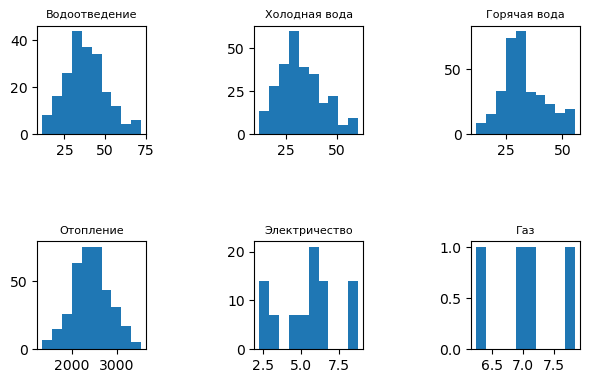

In [232]:
# Отобразим распределение величины тарифов на примере Московской области
region_example = 'Московская область'
plt.figure(figsize=(7,7))
plt.subplots_adjust(hspace=1, wspace=1)

for n, i in enumerate(rates_df[rates_df['Регион'] == region_example]['Вид тарифа'].unique()):
    df = rates_df[(rates_df['Регион'] == region_example)&(rates_df['Вид тарифа'] == i)]
    ax = plt.subplot(3, 3, n + 1)
    plt.hist(df['Величина тарифа (ставки тарифа)'])
    ax.set_title(i[:20], fontsize = 8)

Берем медиану по каждому тарифу:

In [233]:
rates_df_clear = pd.DataFrame()
for r in tqdm(rates_df['Регион'].unique()):
    for t in rates_df[rates_df['Регион']==r]['Вид тарифа'].unique():
        df = rates_df[(rates_df['Регион']==r) & (rates_df['Вид тарифа']==t)]
        df = df.groupby(['Регион', 'Вид тарифа', 'Метрика'])['Величина тарифа (ставки тарифа)'].median().reset_index()
        rates_df_clear = pd.concat([rates_df_clear, df])

100%|███████████████████████████████████████████| 81/81 [00:09<00:00,  8.94it/s]


In [237]:
rates_df_clear.head()

Регион     Вид тарифа          Метрика  \
0  Астраханская область  Холодная вода  Кубический метр   
0  Астраханская область  Водоотведение  Кубический метр   
0  Астраханская область   Горячая вода  Кубический метр   
0  Астраханская область      Отопление      Гигакалория   
0  Астраханская область  Электричество     Киловатт-час   

   Величина тарифа (ставки тарифа)  
0                            34.40  
0                            46.11  
0                            38.79  
0                          2041.67  
0                             5.94

Графически отобразим распределение величины тарифов по всем регионам:

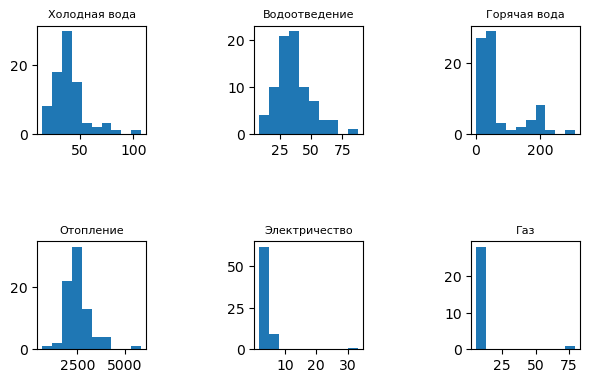

In [304]:
plt.figure(figsize=(7,7))
plt.subplots_adjust(hspace=1, wspace=1)

for n, i in enumerate(rates_df_clear['Вид тарифа'].unique()):
    df = rates_df_clear[rates_df_clear['Вид тарифа'] == i]
    ax = plt.subplot(3, 3, n + 1)
    plt.hist(df['Величина тарифа (ставки тарифа)'])
    ax.set_title(i[:20], fontsize = 8)

Видим большой разброс в данных газа и горячей воды. Видимо, это связано с тем, что были собраны в одно два тарифа, сильно отличающиеся по величине и смыслу:
- 'Тариф на горячую воду (горячее водоснабжение) в закрытых системах теплоснабжения': 'Горячая вода',
- 'Тариф на горячую воду в открытых системах теплоснабжения (горячего водоснабжения)': 'Горячая вода',
- 'Розничная цена на газ, реализуемый населению': 'Газ',
- 'Розничная цена на сжиженный газ, реализуемый населению для бытовых нужд ': 'Газ',

Если в каком-то регионе отсутствуют данные по тарифу, то заполняем данные для этого тарифа медианными показателями для РФ:

#### 2) Средние нормативы потребления

Так как величина нормативов в основном распределена не равномерно, то правильно будет брать не среднее, а медиану тарифов по регионам

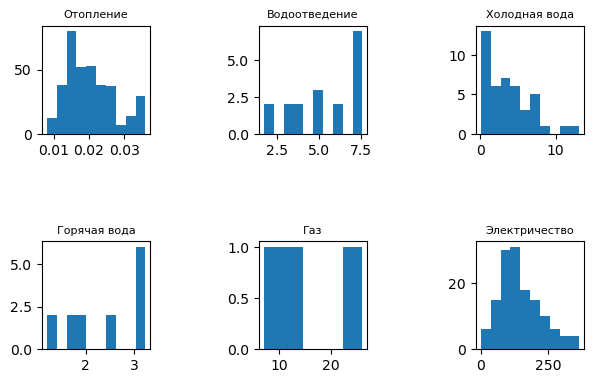

In [290]:
# Отобразим распределение величины тарифов на примере Московской области
region_example = 'Московская область'
plt.figure(figsize=(7,7))
plt.subplots_adjust(hspace=1, wspace=1)

for n, i in enumerate(cons_df[cons_df['Регион'] == region_example]['Коммунальная услуга'].unique()):
    df = cons_df[(cons_df['Регион'] == region_example)&(cons_df['Коммунальная услуга'] == i)]
    ax = plt.subplot(3, 3, n + 1)
    plt.hist(df['Величина норматива'])
    ax.set_title(i[:20], fontsize = 8)

Берем медиану по каждому нормативу:

In [295]:
cons_df_clear = pd.DataFrame()
for r in tqdm(cons_df['Регион'].unique()):
    for t in cons_df[cons_df['Регион']==r]['Коммунальная услуга'].unique():
        df = cons_df[(cons_df['Регион']==r) & (cons_df['Коммунальная услуга']==t)]
        df = df.groupby(['Регион', 'Коммунальная услуга', 'Метрика'])['Величина норматива'].median().reset_index()
        cons_df_clear = pd.concat([cons_df_clear, df])

100%|███████████████████████████████████████████| 85/85 [00:06<00:00, 14.16it/s]


#### 3) Объединяем данные тарифов и нормативов

Дедлайн 👀